In [34]:
%matplotlib inline
#%matplotlib widget
#%pylab inline
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from pylab import *
import numpy as np
import sys
sys.path.append("/home/prom/Dropbox/work/AG_Romanczuk/2017_Couzin_Leadership_Lilian/python/")
# import ProcessTracks as pt
%load_ext autoreload
%autoreload 2
import SwarmLeadershipCouzin as slc
from init import init
import pickle as pkl
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### parameters

In [49]:
agentData, params = init()

recruiting speed=6.0
N = 2
L = 88
leaderCount = 1
leadRange = 12
recruitRange = 8
attstrength = 2.0
time = 300.0
noisep = 5
lead_noisep = 5.0
lead_desPhi = [0.0]
----------------------
agentData.sigmap     = [0.70710678 0.70710678]
agentData.desiredPhi = [0.]
agentData.leadershipWeight  = [1.]
agentData.leadershipRange  = [12.]
agentData.leadingTime       = [-1.]
agentData.pos=
 [[8.56759554 0.4242106 ]
 [5.33459447 9.40978299]]
agentData.initpos=
 [[0. 0.]
 [0. 0.]]
agentData.targetVector=
 [[80. 80.]
 [nan nan]]


In [131]:
#params

In [22]:
#pkl.load(open('/home/prom/Seafile/Leadership/dataPrevious/speed5/para_leadershipRange_0_72_noisep_2.0_5.0.pkl','rb'))

### run

In [50]:
#Single Run with leader

slc.InitAgents(agentData,params)
print(agentData.pos[:leaderCount])
#print(agentData.desiredPhi[:leaderCount])
outdata=slc.SingleRun(params,agentData);
print('finalStep   ={}'.format(outdata['finalStep']))
print('finalOutStep={}'.format(outdata['finalOutStep']))
print("-------------------")
#print(agentData.pos)
#print(agentData.POS)
#print(agentData.initpos)

[[1.54561636 5.25216759]]
Performing a single run.
Target reached!
i=0,s=1645
agentData.POS[0]=[83.08051104 76.709972  ]
agentData.initpos[0]=[1.54561636 5.25216759]
agentData.distTarget[0]=4.801607025135863
agentData.leadingTime[0]=82.25
agentData.targetVector[0]=[80. 80.]
Distance to target 5 reached by all leading agents. Stopping Simulation.
[82.25]
Stopping time: 82.25
finalStep=1645, finalPosLeader=[[83.08051104 76.709972  ]]
Done!
finalStep   =1645
finalOutStep=822
-------------------


### save output

In [75]:
import csv
print(outdata.keys())
print(outdata["leadingRecord"])
# pd.DataFrame.from_dict(outdata)
keys = outdata.keys()
for key in keys:
    print(key)
    if type(outdata[key]) == list:
        print(len(outdata[key]))
    else:
        print(outdata[key])

with open('mycsvfile.csv', 'w') as f:  # You will need 'wb' mode in Python 2.x
    w = csv.DictWriter(f, outdata.keys())
    w.writeheader()
    w.writerow(outdata)

dict_keys(['pos', 'POS', 'vel', 'phi', 'speed', 'force', 'timer_s', 't', 'finalStep', 'finalOutStep', 'leadingRecord', 'leadingTime'])
[[1. 1. 1. ... 0. 0. 0.]]
pos
823
POS
823
vel
823
phi
823
speed
823
force
823
timer_s
0
t
823
finalStep
1645
finalOutStep
822
leadingRecord
[[1. 1. 1. ... 0. 0. 0.]]
leadingTime
[82.25]


### plot

LeadingRatio0=0.46322188449848023
Avg. Total Displacement=64.41825557536846
Init. x-POS  : [1.54561636 8.7870179 ]
Final x-POS  : [83.32456721 55.84457819]
Final delta x: [81.77895085 47.0575603 ]
Target vector:[80, 80]
Final distance vector target x: [[-3.32456721  3.46448883]
 [24.15542181 -5.74887143]]
Final distance vector target x: [ 4.80160703 24.83010119]


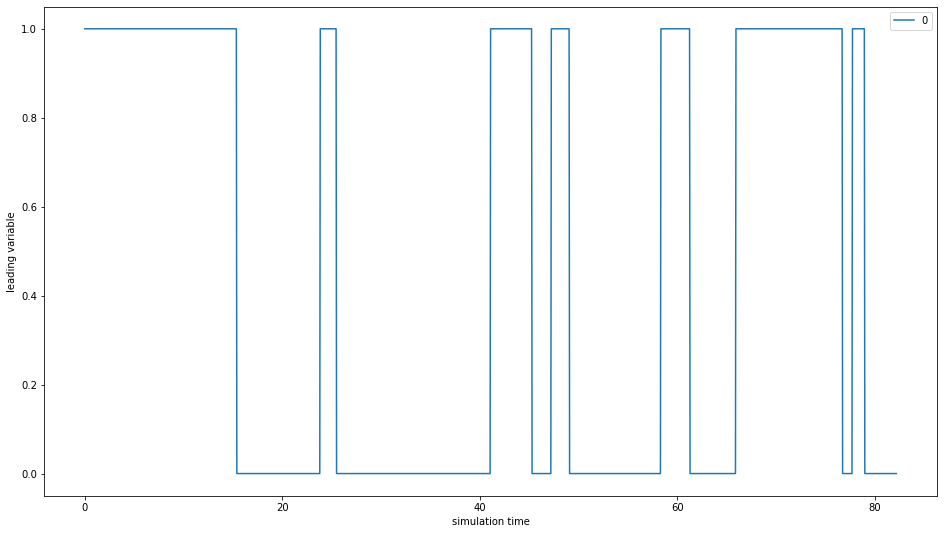

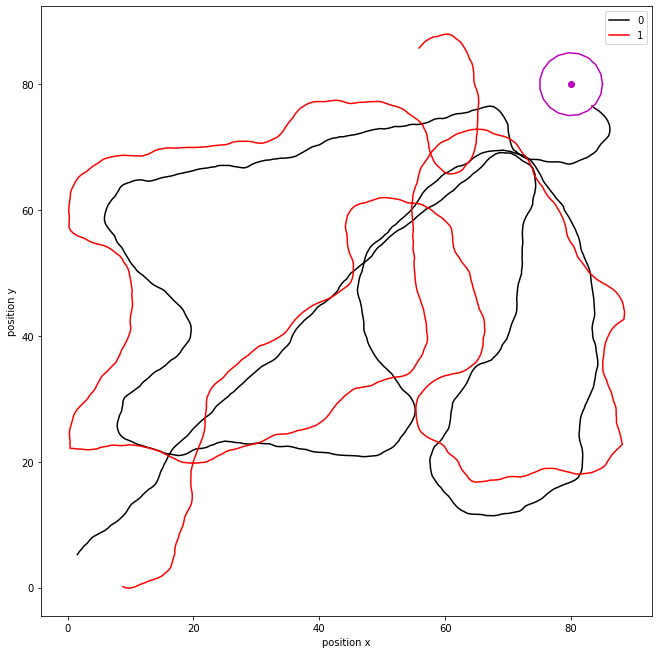

In [55]:

###########################################################
# Plot Leading Ratio versus time
if(leaderCount>0):
    f=figure(figsize=(16,9))
    
    leadingRecord=outdata['leadingRecord'][:,:].T
    timearray=np.arange(len(leadingRecord))*params['dt']
    plot(timearray,leadingRecord[:,0],label='0')
    if(leaderCount>1):
        plot(timearray,leadingRecord[:,1],label='1')
    legend()
    ylim([-0.05,1.05])
    xlabel("simulation time")
    ylabel("leading variable")
    leading_ratio0=np.sum(outdata['leadingRecord'][0])/len(outdata['leadingRecord'][0])
    print("LeadingRatio0={}".format(leading_ratio0))
    if(len(leadingRecord[1])>1):
        leading_ratio1=np.sum(outdata['leadingRecord'][1])/len(outdata['leadingRecord'][1])
        print("LeadingRatio1={}".format(leading_ratio1))
        
###########################################################

params['L']
POS=np.array(outdata['POS'])
circlepoints=20
radius=5
c=params['targetVectorList'][0]
theta=np.linspace(0,2*np.pi,circlepoints)
f=figure(figsize=(16,9))
subplot(aspect='equal')
plot(POS[:,0,0],POS[:,0,1],'k',label='0')
plot(POS[:,1,0],POS[:,1,1],'r',label='1')
# plot(POS[:,2,0],POS[:,2,1],'r--',label='1')
legend()
tight_layout()
if(targetType==2):
    plot(c[0]+radius*np.cos(theta),c[1]+radius*np.sin(theta),"m-")
    plot(c[0],c[1],'mo')
# Calculate total displacement along X as measure of leadership success
total_displacements_in_X=POS[-1,:,0]-POS[0,:,0]
#print(total_displacements_in_X)
avg_total_displacement=np.mean(total_displacements_in_X)
print("Avg. Total Displacement={}".format(avg_total_displacement))
#if(targetType==2):
#    xlim([0,L])
#    ylim([0,L])
xlabel("position x")
ylabel("position y")
print("Init. x-POS  : {}".format(POS[0,:,0]))
print("Final x-POS  : {}".format(POS[-1,:,0]))
print("Final delta x: {}".format(total_displacements_in_X))
print("Target vector:{}".format(params['targetVector']))
print("Final distance vector target x: {}".format(params['targetVector']-POS[-1,:]))
print("Final distance vector target x: {}".format(np.linalg.norm(params['targetVector']-POS[-1,:],axis=1)))

In [27]:
tidx=-1
#print(outdata['POS'][tidx])
print(np.linalg.norm(np.diff(outdata['POS'][tidx],axis=0)))
#agentData.attrange
print("repstrengths",agentData.repstrength)
print("algstrengths",agentData.algstrength)
print("attstrengths",agentData.attstrength)
print("attrange",agentData.attrange)
print("algrange",agentData.algrange)
print(agentData.leadershipRange)
print(agentData.force_att)

67.54415922068547
repstrengths [5. 5. 5.]
algstrengths [8. 0. 0.]
attstrengths [0. 2. 2.]
attrange [100.  20.  20.]
algrange [ 5. 10. 10.]
[12.]
[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.97992845 -0.19934954]]


In [28]:
outdata=slc.CalcLeadingPerformance(outdata,params)
print('targetMovement0',outdata['targetMovement0'])
print('leadingTime={}'.format(outdata['leadingTime']))
print('all_avgdist={}'.format(outdata['all_avgdist']))

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [31]:
def DistToTarget(X,Y,targetPos=[80,80]):
    
    distX=X-targetPos[0]
    distY=Y-targetPos[1]
    dist =np.sqrt(distX**2+distY**2)
    
    return distX,distY,dist

def CalculateDistanceFromEndZone(X,Y,endzone=[[65,80],[65,80]]): 
    ''' Calculate Distance From Endzone.

        Parameters: 
        ----------
        X : x-coordinates (array like)
        Y : y-coordinates (array like)
        endzone : endzone coordinates ([[xmin,xmax],[ymin,ymax]])

        Returns:
        --------

        distX,distY: numpy arrays

    '''
    distX = np.zeros(np.shape(X))
    distY = np.zeros(np.shape(Y))
    xzone = endzone[0][0]
    yzone = endzone[1][0]
    distX[X<xzone]=xzone-X[X<xzone]
    distY[Y<yzone]=yzone-Y[Y<yzone]

    return distX,distY

def TransformResultsToRoboDF(outdata,params):
    
    number_of_fish=params['N']-1
    
    new_columns=['Framenumber','Behaviour',
                    'Robo Position x','Robo Position y',
                    'Robo Dist EndZone x','Robo Dist EndZone y',
                    'Robo Dist EndZone','Robo Speed EndZone',
                    'Robo VX','Robo VY','Robo Speed'
                    ]   
    
    for i in range(number_of_fish):
        idxstring=""
        if(i>0):
        
            idxstring=".%d" % i

            new_columns+=['Fish Position x'+idxstring,
                      'Fish Position y'+idxstring,  
                      'Fish Dist EndZone x'+idxstring,
                      'Fish Dist EndZone y'+idxstring,
                      'Fish Dist EndZone'+idxstring,
                      'Fish Speed EndZone'+idxstring,
                      'DeltaPosX'+idxstring,
                      'DeltaPosY'+idxstring,
                      'DeltaPos'+idxstring,
                      'Fish VX'+idxstring,
                      'Fish VY'+idxstring,
                      'DeltaVX'+idxstring,
                      'DeltaVY'+idxstring,
                      'Vrel'+idxstring
                     ]
    #print(new_columns)    
        
    POS=np.array(outdata['POS'])   
    dt=params['output']
    df_new=pd.DataFrame(columns=new_columns)
    X=POS[:,0,0]
    Y=POS[:,0,1]
    framenumber=np.arange(len(X))
    outstep=int(params['output']/params['dt'])
    
    distX,distY=CalculateDistanceFromEndZone(X,Y)
    df_new['Framenumber']=framenumber
    df_new['Behaviour']   =outdata['leadingRecord'][0][::outstep]
    df_new['Robo Position x']     = X
    df_new['Robo Position y']     = Y
    df_new['Robo Dist EndZone x'] = pd.Series(distX)
    df_new['Robo Dist EndZone y'] = pd.Series(distY)
    df_new['Robo Dist EndZone']   = np.sqrt(df_new['Robo Dist EndZone x']**2+df_new['Robo Dist EndZone y']**2)
    df_new['Robo Speed EndZone']  = -np.gradient(df_new['Robo Dist EndZone'])/dt
    VX=np.gradient(X)/dt
    VY=np.gradient(Y)/dt
    df_new['Robo VX']   = VX 
    df_new['Robo VY']   = VY
    df_new['Robo Speed']= np.sqrt(VX**2+VY**2)
    
    for i in range(number_of_fish):
        idxstring=""
        if(i>0):
            idxstring=".%d" % i

        #print("idxstring="+idxstring)

    
        X=POS[:,i+1,0]
        Y=POS[:,i+1,1]
        distX,distY=CalculateDistanceFromEndZone(X,Y)
        
        df_new['Fish Position x'+idxstring] = X
        df_new['Fish Position y'+idxstring] = Y
        VX=np.gradient(X)/dt
        VY=np.gradient(Y)/dt
        df_new['Fish VX'+idxstring]   = VX 
        df_new['Fish VY'+idxstring]   = VY
        df_new['Fish Speed'+idxstring]   = np.sqrt(df_new['Fish VX'+idxstring]**2+df_new['Fish VY'+idxstring]**2)
        df_new['Fish Dist EndZone x'+idxstring] = pd.Series(distX)
        df_new['Fish Dist EndZone y'+idxstring] = pd.Series(distY)
        df_new[ 'Fish Dist EndZone'+idxstring]  = np.sqrt(df_new['Fish Dist EndZone x'+idxstring]**2+df_new['Fish Dist EndZone y'+idxstring]**2)
        df_new['Fish Speed EndZone'+idxstring]  = -np.gradient(df_new['Fish Dist EndZone'+idxstring])/dt
        
        df_new['DeltaPosX'+idxstring]    = df_new['Robo Position x']-df_new['Fish Position x'+idxstring]
        df_new['DeltaPosY'+idxstring]    = df_new['Robo Position y']-df_new['Fish Position y'+idxstring]
        df_new[ 'DeltaPos'+idxstring]    = np.sqrt(df_new['DeltaPosX'+idxstring]**2 +  df_new['DeltaPosY'+idxstring]**2)
                   
#
        df_new.loc[:,'DeltaVX'+idxstring]  = df_new['Robo VX']-df_new['Fish VX'+idxstring]
        df_new.loc[:,'DeltaVY'+idxstring]  = df_new['Robo VY']-df_new['Fish VY'+idxstring]
        df_new.loc[:,'Vrel'+idxstring]     = df_new['DeltaVX'+idxstring]*df_new['DeltaPosX'+idxstring]+df_new['DeltaVY'+idxstring]*df_new['DeltaPosY'+idxstring]
        

    
    #print(dt)
    #print(df_new)
    return df_new
 

In [207]:
startmilling=np.where(df_new['Behaviour']=='Start (milling)')[0]
print(startmilling)

[]


In [187]:
len(outdata['leadingRecord'][0][::outstep])


581

In [29]:
params['output']

0.1

In [32]:
df=TransformResultsToRoboDF(outdata,params)

ValueError: Length of values (262) does not match length of index (263)

In [235]:

df.DeltaPos

0      4.962929
1      5.414980
2      5.728853
3      5.817912
4      5.869526
         ...   
576    2.627982
577    2.561969
578    2.544522
579    2.512223
580    2.350052
Name: DeltaPos, Length: 581, dtype: float64

In [236]:
pt.CalcAverageVariables(df,fps=10,number_of_fish=1)

number of fish=1
[0]
-1
Frame Start=1.0
Frame at EndZone       (Robo,Fish)=(258.0,260.0)
DeltaFrames to EndZone (Robo,Fish)=(257.0,259.0)


,Trial,Robo Time To EndZone,Fish Time To EndZone,Avg. Dist,Robo Avg. Speed,Robo Avg. Speed EndZone,Robo LeadTime,Robo FollowTime,Robo LeadRatio,Fish_Avg_Speed,Fish_Avg_Speed_EndZone
0,trial,25.7,25.9,4.798285,5.965,0.171,0.0,57.9,0.0,5.961,0.22


In [255]:

alldat=pkl.load(open("/home/prom/work/Leadership/DATA/alldat_targetType2_Nl2_S6.0_leadershipRangeList_0.0_16.0_leader_algstrength_4.0_16.0.pkl",'rb'))
allpar=pkl.load(open("/home/prom/work/Leadership/DATA/para_targetType2_Nl2_S6.0_leadershipRangeList_0.0_16.0_leader_algstrength_4.0_16.0.pkl","rb"))

In [268]:
idx=1
allpar[idx]['leadershipRangeList']
params=allpar[idx]
outdat=alldat[idx]

In [269]:
params['output']/params['dt']

10.0

In [279]:
df

,Framenumber,Behaviour,Robo Position x,Robo Position y,Robo Dist EndZone x,Robo Dist EndZone y,Robo Dist EndZone,Robo Speed EndZone,Robo VX,Robo VY,...,Fish Dist EndZone x,Fish Dist EndZone y,Fish Dist EndZone,Fish Speed EndZone,DeltaPosX,DeltaPosY,DeltaPos,DeltaVX,DeltaVY,Vrel
0,0,0.0,4.917484,7.023082,60.082516,57.976918,83.493903,2.537296,-4.354018,8.534209,...,56.326184,58.455229,81.176676,-0.509262,-3.756333,0.478311,3.786663,0.220929,4.681205,1.409186
1,1,0.0,2.740475,11.290186,62.259525,53.709814,82.225255,1.615481,-5.026988,8.329880,...,58.613657,56.528727,81.431307,-0.531323,-3.645868,2.818913,4.608538,-0.515699,4.418204,14.334707
2,2,0.0,-0.109504,15.352962,65.109504,49.647038,81.878422,3.371035,-2.709455,9.021787,...,60.837472,54.543553,81.708000,-0.830589,-4.272032,4.896515,6.498163,1.851949,5.180167,17.453181
3,3,0.0,0.031020,20.311973,64.968980,44.688027,78.854220,5.390368,-0.254929,9.924082,...,63.175061,52.687107,82.261896,-0.786024,-1.793919,7.999080,8.197770,4.084306,5.949896,40.266786
4,4,0.0,-0.364433,25.277044,65.364433,39.722956,76.488053,4.433624,-0.836348,9.930523,...,65.176707,50.569368,82.494024,1.474967,-0.187726,10.846411,10.848036,1.280720,4.819312,52.031816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,0.0,85.568329,67.773383,0.000000,0.000000,0.000000,2.204850,0.148598,9.973136,...,0.000000,0.506474,0.506474,3.493827,0.782595,3.279857,3.371931,0.332380,3.992780,13.355868
296,296,0.0,85.442396,72.768286,0.000000,0.000000,0.000000,-0.000000,-0.339889,9.987866,...,0.000000,0.000000,0.000000,0.506474,0.678691,5.281757,5.325184,1.020224,4.348186,23.658479
297,297,0.0,85.228440,77.761249,0.000000,0.000000,0.000000,-0.000000,-2.959214,8.978206,...,0.000000,0.000000,0.000000,-0.000000,1.802819,7.628043,7.838188,0.243115,3.995327,30.914821
298,298,0.0,82.483182,81.746492,0.000000,0.000000,0.000000,-0.000000,-7.281508,6.056895,...,0.000000,0.000000,0.000000,-0.000000,0.921806,9.277084,9.322769,-4.603415,0.938383,4.462004


<IPython.core.display.Javascript object>


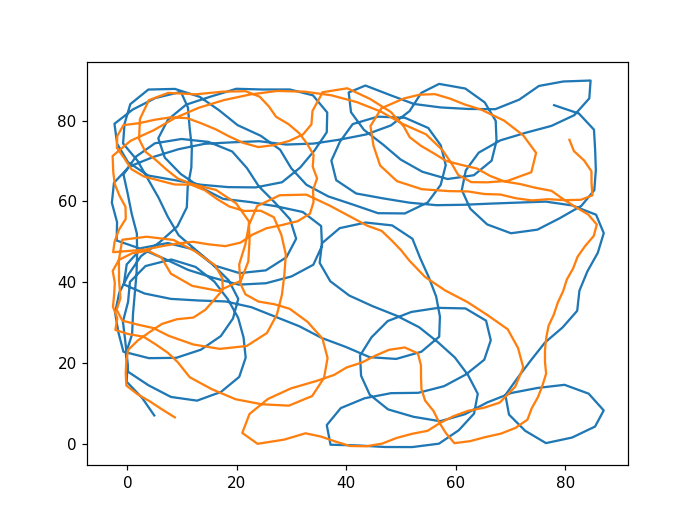

In [278]:
len(outdata['POS'])
POS=np.array(outdat['POS'])
plot(POS[:,0,0],POS[:,0,1],'-')
plot(POS[:,1,0],POS[:,1,1],'-')

In [271]:
df=TransformResultsToRoboDF(outdat,params)

In [274]:
pt.CalcAverageVariables(df,fps=10,number_of_fish=1)

number of fish=1
[0]
-1
Frame Start=1.0
Frame at EndZone       (Robo,Fish)=(258.0,79.0)
DeltaFrames to EndZone (Robo,Fish)=(257.0,78.0)


,Trial,Robo Time To EndZone,Fish Time To EndZone,Avg. Dist,Robo Avg. Speed,Robo Avg. Speed EndZone,Robo LeadTime,Robo FollowTime,Robo LeadRatio,Fish_Avg_Speed,Fish_Avg_Speed_EndZone
0,trial,25.7,7.8,18.10295,9.641,0.556,0.0,29.8,0.0,7.089,0.546


In [61]:
#print(agentData.distTarget)
#print(agentData.currTargetVector)
#print(agentData.force_alg)
for i in range(len(targetVectorList)):
    print(targetVectorList[i])
    print("targetMovement{}".format(i),slc.CalcMovementSuccess(POS,params,targetVectorList[i]))

[2000, 0]
targetMovement0 [0.75057429 0.74453153]
[-2000, 0]
targetMovement1 [-0.75047635 -0.74615424]


In [15]:
a=np.nan
a=1
if(~(np.isnan(a))):
    print("Not NaN")

Not NaN


In [87]:
finalVecToTarget=params['targetVector']-POS[-1]
finalDistToTarget=np.linalg.norm(finalVecToTarget,2,axis=1)
print(finalVecToTarget)
print(finalDistToTarget)

[[174.56277226  31.9332917 ]
 [185.48955026  35.46259143]]
[177.45956322 188.84906314]


In [48]:
a=np.arange(0,51,3)
b=np.ones(len(a))*18
leadershipRangeList=list(zip(a,b))
tmp=np.zeros(2)
tmp=np.array(leadershipRangeList[5][:])
print(tmp)

[15. 18.]


In [31]:
POS=np.zeros((2,2,2))
phi0=np.pi/3.
phi1=0.0
POS[1,0,:]=s*t*np.array([np.cos(phi0),np.sin(phi0)])
POS[1,1,:]=s*t*np.array([np.cos(phi1),np.sin(phi1)])

slc.CalcLeadingSuccess(POS,params,targetVector=[1000,0])


array([0.5, 1. ])

200.0

In [80]:
outdata['all_displacements_vec']

array([[228.94167554, 146.56845616],
       [251.42955689, 166.4428265 ]])

In [85]:
outdata['all_displacements_vec']
outdata['avg_displacements_vec']

array([459.54365402, 178.89319617])

In [75]:
from sklearn.preprocessing import normalize 
targetVectors=np.nan*np.ones((params['N'],2))
for i in range(len(params['targetVectorList'])):
    targetVectors[i]=params['targetVectorList'][i]
            
    targetUnitVector=targetVectors[i]/np.linalg.norm(targetVectors[i])
    all_displacements_vec=(POS[-1,:,:]-POS[0,:,:])
    all_displacements=np.linalg.norm(np.multiply(all_displacements_vec,targetUnitVector),axis=1)


In [57]:
print(all_displacements_vec)
print(all_displacements)

[[551.1766325  -61.63021402]
 [545.8484572  -68.50025724]]
[551.1766325 545.8484572]


In [66]:
outdata.keys()
pos=outdata['pos']
print(np.shape(pos))

(5001, 2, 2)


In [69]:
tidx=1000
print(POS[tidx,0,:])
print(POS[tidx,1,:])
print(pos[tidx][0,:])
print(pos[tidx][1,:])


[-76.62895883 115.37205153]
[-91.68066937 -15.5297242 ]
[11.37104117 27.37205153]
[84.31933063 72.4702758 ]


In [128]:
f.savefig("/mnt/DATA/leadershipModel/exampleTraj_leadZ_{}_noise_{}.png".format(leadershipRange,noisep),dpi=300)

In [43]:
df=pd.DataFrame(columns=['time','xL','yL','xF','yF','leadMode'])
df['time']=timearray[::5]
df['xL']=POS[:-1,0,0]
df['yL']=POS[:-1,0,1]
df['xF']=POS[:-1,1,0]
df['yF']=POS[:-1,1,1]
df['leadMode']=leadingRecord[::5]

In [41]:
len(POS[:,0,0])
len(timearray[::5])

5000

<IPython.core.display.Javascript object>


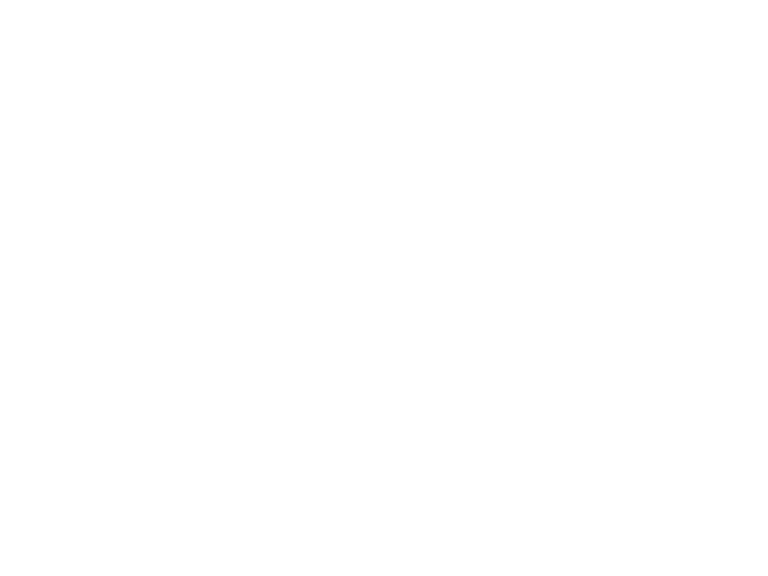

<IPython.core.display.Javascript object>


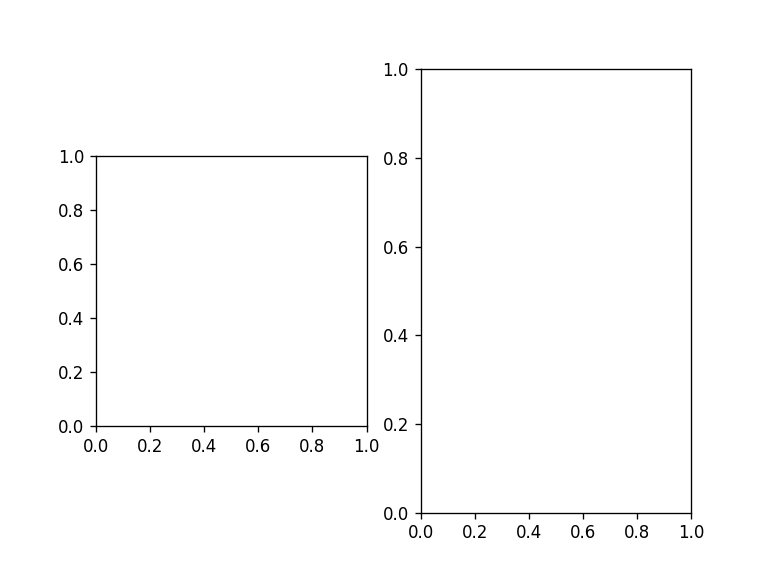

KeyError: 'xL'

In [16]:

circlepoints=20
radius=5
c=params['targetVector']
theta=np.linspace(0,2*np.pi,circlepoints)
f=figure()
subplots(1,2)
subplot(121,aspect='equal')
plot(df['xL'],df['yL'],'-')
plot(df[df.leadMode==0]['xL'],df[df.leadMode==0]['yL'],'r.',markersize=1)
plot(c[0]+radius*np.cos(theta),c[1]+radius*np.sin(theta),"m-")
xlabel("position x")
ylabel("position y")
#xlim([0,88])
#ylim([0,88])
text(8,80,'Leader')

subplot(122,aspect='equal')
plot(df['xF'],df['yF'],'-')
plot(df[df.leadMode==0]['xF'],df[df.leadMode==0]['yF'],'r.',markersize=1)
plot(c[0]+radius*np.cos(theta),c[1]+radius*np.sin(theta),"m-")
xlabel("position x")
text(8,80,'Follower')
#xlim([0,88])
#ylim([0,88])
tight_layout()
#savefig("/mnt/DATA/leadershipModel/exampleTraj_leadZ_{}_noise_{}.png".format(leadershipRange,noisep),dpi=300)

<IPython.core.display.Javascript object>


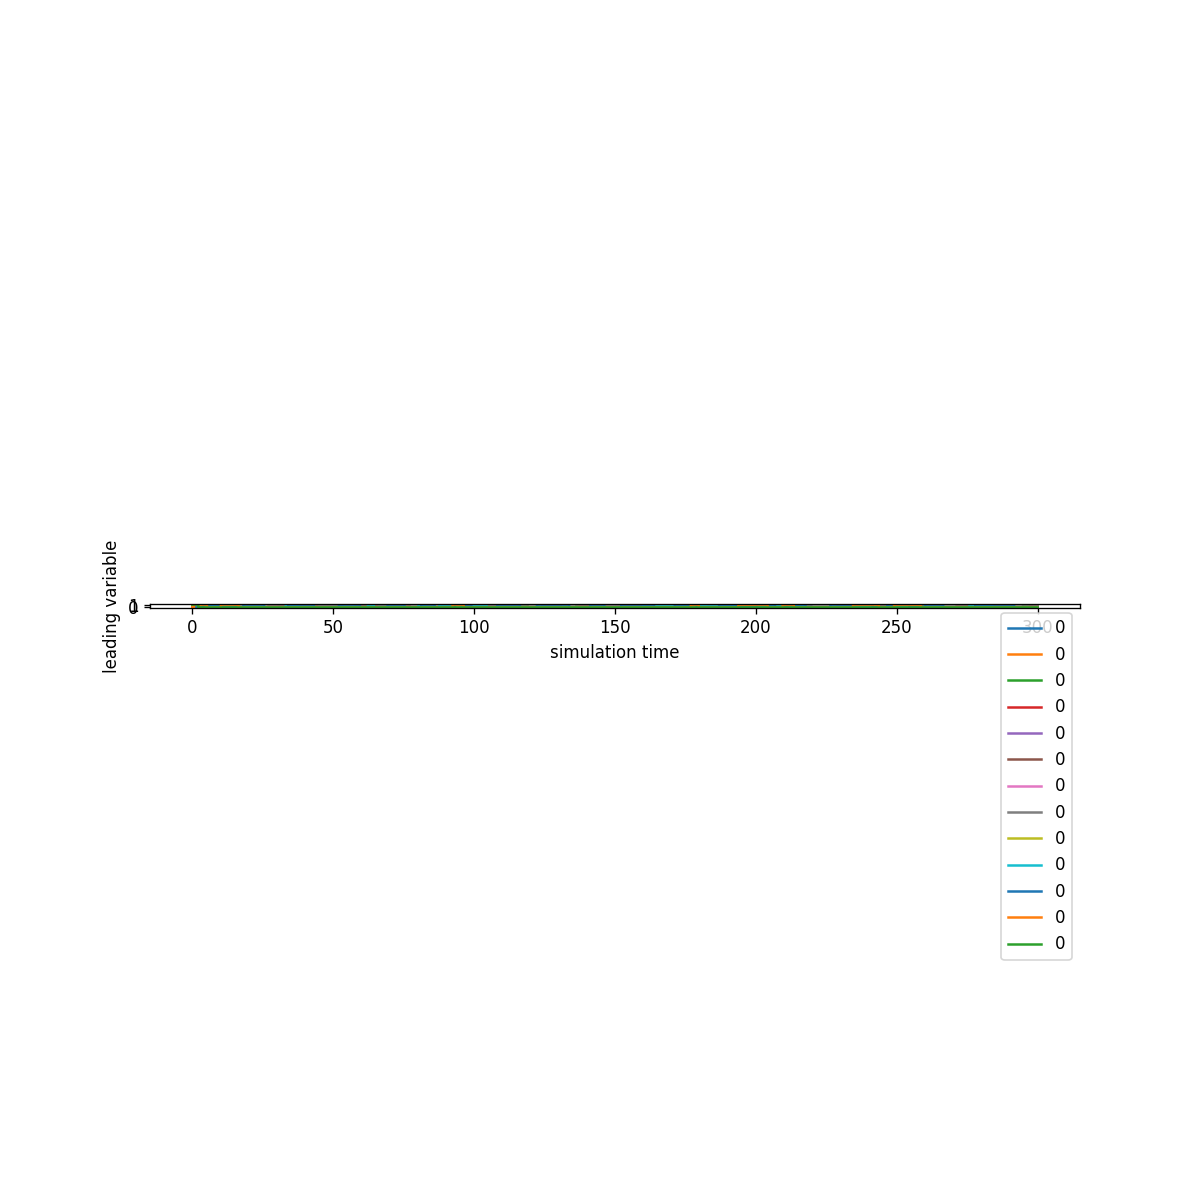

KeyError: 'xL'

In [17]:
figure(figsize=(10,10))
subplot(aspect='equal')
plot(df['xL'],df['yL'],'-')
plot(df['xF'],df['yF'],'-')

In [278]:
#POS=np.array(outdata['POS'])
#pos=np.array(outdata['pos'])
#print(shape(POS))
#figure(figsize=(20,3))
#subplot(aspect='equal')
#plot(POS[:,0,0],POS[:,0,1])
#plot(pos[:,0,0],pos[:,0,1])

In [98]:
outdata['finalStep']*params['dt']

36.35

LeadingRatio=0.2628


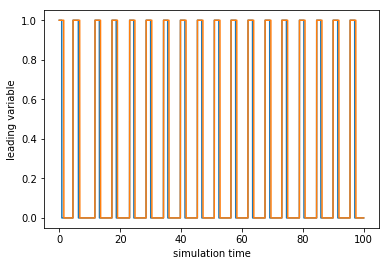

In [63]:
# Plot Leading Ratio versus time
leadingRecord=outdata['leadingRecord'][:,:].T
timearray=np.arange(len(leadingRecord))*params['dt']
plot(timearray,leadingRecord)
ylim([-0.05,1.05])
xlabel("simulation time")
ylabel("leading variable")
leading_ratio=np.sum(outdata['leadingRecord'][0])/len(outdata['leadingRecord'][0])
print("LeadingRatio={}".format(leading_ratio))

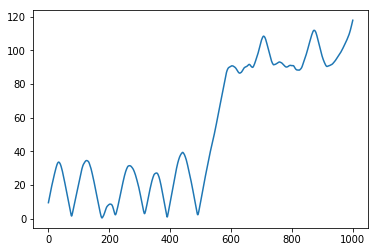

In [74]:
POS=np.array(outdata['POS'])
np.shape(POS)
distVec=POS[:,0,:]-POS[:,1,:]
plot(np.linalg.norm(distVec,axis=1))

In [375]:
#print(outdata['leadingTime'])
#print(outdata.keys())
agentData.sigmap**2/dt

array([ 0.1,  1. ])

[ 95.39189277  85.28049831]
90.3361955385


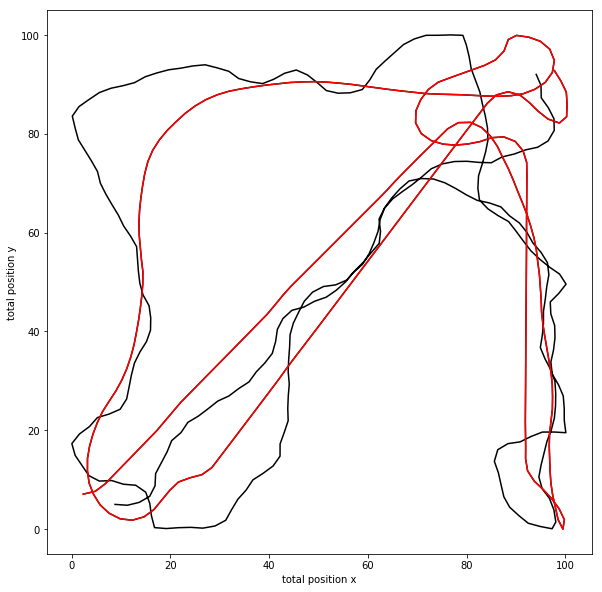

In [21]:
params['L']
POS=np.array(outdata['POS'])
figure(figsize=(20,10))
subplot(aspect='equal')
plot(POS[:,:,0],POS[:,:,1],'k')
plot(POS[:,0,0],POS[:,:params['leaderCount'],1],'r')

# Calculate total displacement along X as measure of leadership success
total_displacements_in_X=POS[-1,:,0]-POS[0,:,0]
print(total_displacements_in_X)
avg_total_displacement=np.mean(total_displacements_in_X)
print(avg_total_displacement)
xlabel("total position x")
ylabel("total position y")

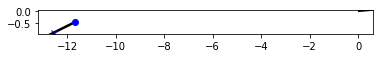

In [298]:
subplot(aspect='equal')
plot(agentData.pos[1,0]-agentData.pos[0,0],agentData.pos[1,1]-agentData.pos[0,1],"bo")
quiver(agentData.pos[:,0]-agentData.pos[0,0],agentData.pos[:,1]-agentData.pos[0,1],agentData.uv[:,0],agentData.uv[:,1],scale=2)
distM,dX,dY=slc.CalcDistVecMatrix(agentData.pos,1000,-2)
approachPointX=-dX[0,1]+agentData.uv[1,0]
approachPointY=-dY[0,1]+agentData.uv[1,1]
plot(approachPointX,approachPointY,"bx")


In [299]:
params["leader_noisep"]=0.0
agentData.sigmap[:params['leaderCount']]=np.ones(params['leaderCount'])*np.sqrt(2.*params['dt']*params["leader_noisep"]);

print(agentData.sigmap)

[ 0.          0.14142136]


In [143]:
# Calculate Leading Performance for a run
outdata=slc.CalcLeadingPerformance(outdata,params,ignore_timepoints=0)


-----------------------------------
Leader i=0
-----------
all_avgdist      = [ 9.86911116]
tot_avgdist      = 9.86911115934609
all_finaldist    = [ 10.31422544]
tot_finaldist    = 10.314225438676756
leadRatio        = 0.6655844155844156
leadingTime      = [ 24.64]
avg_displacement = 91.02001713546939
lead_displacement = [ 0.61628073  5.46734219]
fish_displacement = [[-10.8694636    6.08740603]]
-----------------------------------
proj_lead_displacements = 5.501966243866211
proj_fish_displacements = [ 12.45799949]
-----------------------------------


In [509]:
print(np.linalg.norm(outdata['lead_displacement']))


94.6564479392


In [3]:
#targetUnitVector=np.ones(2)/np.sqrt(2.)
#all_displacements=outdata['all_displacements']
#prod=(np.multiply(all_displacements,targetUnitVector))
#print(prod)
#print(np.linalg.norm(prod,axis=1))
#print(all_displacements*1./np.sqrt(2.))

In [301]:
# All results can be accessed in outdata
print("Average distance to leader: {}".format(outdata['tot_avgdist'][0]))
print("Lead Ratio: {}".format(outdata['leadRatio'][0]))
print("Average displacement in x-direction: {}".format(outdata['avg_displacement'][0]))

Average distance to leader: 10.265166473961166
Lead Ratio: 0.59488
Average displacement in x-direction: 78.89957848439653


In [131]:
#agentData.leading[1]=0
print(agentData.force_alg)
print(agentData.timer)

[[ 0.03239109 -0.99947527]
 [ 0.          0.        ]]
[0.]


# Parallel Run

In [3]:
para1name='leader_algstrength'
para2name='leadershipRangeList'
para1values=[4]
para2values=[[0,12],[12,12]]

In [135]:
outdata=slc.SingleRun(params,agentData)

Performing a single run.
initialPosLeader=[[ 200.51799674  108.37659888]]
Leading distance 100.0 reached by all leaders! Stopping Simulation.
finalPosLeader=[[ 200.56773001  108.37144122]]
Done!


SozialerLeader/SwarmLeadershipCouzin.py:483: RuntimeWarning: invalid value encountered in true_divide
  dUX=np.divide(dX,distmatrix)
SozialerLeader/SwarmLeadershipCouzin.py:484: RuntimeWarning: invalid value encountered in true_divide
  dUY=np.divide(dY,distmatrix)


In [48]:
params['leaderCount']

1

In [9]:
# Running Parameter Scan on Mmltiple threads in parallel
#params=slc.InitParams(time=500,BC=-2)
outdata_list,para_list=slc.RunParallelScan(para1name,para2name,
                                           para1values,para2values,
                                           runs=3,params=params,agentData=agentData);

leader_algstrength 4


ValueError: cannot copy sequence with size 2 to array axis with dimension 1

In [4]:
#data=pkl.load(open("/home/prom/DATA/leadershipModel/leadershipRange_8_84_noisep_1.0_2.0.h5","rb"))

In [4]:

#fish parameter

N=2;              # default parameter 300
L=3000                # default parameter 50
L=88
time=300.0          # default parameter 300
dt=0.05             # default parameter 0.05

BC=1               # default parameter 0, reflecting 1
IC=1               # initial condition
targetType=2
leadingDistance=2000;

factor=1.0
speed0=factor*10.0

repstrength=factor*5.0     # default parameter 5.0
algstrength=factor*0.0     # default parameter 1.0
attstrength=factor*2.0     # default parameter 0.5
noisep=5.0;                # default parameter 0.2

attstrengthDist=0

reprange=3.0        # default parameter 1.0
algrange=10.0       # default parameter 5.0
attrange=20.0       # default parameter 25.0


#singleLeader=True
leaderCount=2
leadershipRange=16
recruitingRange=8
recruitingAttStrength=factor*10.0
recruitingTime=dt
recruitingSpeed=1.0*speed0

leader_repstrength=repstrength
leader_algstrength=factor*4.0
leader_attstrength=2.*attstrength    

leader_reprange=reprange
leader_algrange=0.5
leader_attrange=1000.0

leader_noisep=noisep

leader_desiredPhi=[0.0]
#leader_desiredPhi=[0.0,None]

leadershipRangeList=[leadershipRange]
#leadershipRangeList=[leadershipRange,12]

#targetVectorList=[[2000,0]]
targetVectorList=[[80,80]]
#targetVectorList=[[2000,0],[-2000,0]]

if(leaderCount>1):
    leadershipRangeList=[leadershipRange,leadershipRange]
    #leader_desiredPhi=[0.0,np.pi]
    leader_desiredPhi=[0.0,None]
else:
    leadershipRangeList=[leadershipRange]
    leader_desiredPhi=[0.0]

dist_dependence='zone'
int_type='matrix'
output=0.5

#dist_dependence='overlap'
#dist_dependence='zone'

#if(targetType==2):
#    L=88                 # size experimental tank 
#    IC=1
#    BC=1
#    attrange=100
#    attstrength=0

# initialize system parameters
params=slc.InitParams(N=N,L=L,time=time,dt=dt,BC=BC,IC=IC,output=output,int_type=int_type,speed0=speed0,                               
                        repstrength=repstrength,reprange=reprange,
                        algstrength=algstrength,algrange=algrange,
                        attstrength=attstrength,attrange=attrange,
                        attstrengthDist=attstrengthDist,
                        noisep=noisep,
                        targetType=targetType,targetVectorList=targetVectorList,
                        leader_noisep=leader_noisep,
                        leaderCount=leaderCount,leadershipRange=leadershipRange,leadingDistance=leadingDistance,
                        recruitingRange=recruitingRange,recruitingTime=recruitingTime,
                        recruitingAttStrength=recruitingAttStrength,recruitingSpeed=recruitingSpeed,
                        leader_repstrength=leader_repstrength,leader_algstrength=leader_algstrength,leader_attstrength=leader_attstrength,
                        leader_reprange=leader_reprange,leader_algrange=leader_algrange,leader_attrange=leader_attrange,
                        leader_desiredPhi=leader_desiredPhi
                        )

#########################################
agentData=slc.AgentData(params)
slc.InitAgents(agentData,params)
###########################################
#if(leaderCount>0):
#        
#        agentData.repstrength[:leaderCount]=leader_repstrength
#        agentData.algstrength[:leaderCount]=leader_algstrength
#        agentData.attstrength[:leaderCount]=leader_attstrength
#
#        agentData.reprange[:leaderCount]=leader_reprange
#        agentData.algrange[:leaderCount]=leader_algrange
#        agentData.attrange[:leaderCount]=leader_attrange
#


para1name="leadershipRange"
#para1values=[0,8,10,12,14,16,18,20,22,24,24,26]
#para1values=np.arange(6.,37.,2.0)
para1values=np.arange(0.,74.0,12.0)
#para1val_addon=np.array([0,48,60,72])

random_range=True

if(leaderCount>1):
    para1name="leadershipRangeList"
    array1=para1values
    array2=np.ones(len(array1))*leadershipRange

    para1values=np.array(tuple(zip(array1,array2)))

    

#para2name="noisep"
para2name="leader_algstrength"
#para2name="recruitingAttStrength"
#para2values=factor*np.array([0.5])
para2values=factor*np.array([8.0,12.0,16.0])

runs=2
n_proc=10

outpath='/home/prom/work/Leadership/DATA/'
outname="targetType{}_Nl{}_S{}_".format(targetType,leaderCount,speed0)+para1name+"_{}_{}".format(np.min(para1values),np.max(para1values))+"_"+para2name+"_{}_{}".format(np.min(para2values),np.max(para2values))

outparams=outpath+'para_'+outname+'.pkl'
outresult=outpath+outname+'.h5'

#####################################################################
print("N    = %d" % params['N'])
print("L    = %d" % params['L'])
print("Nl   = %d" % params['leaderCount'])
print("time = %g" % params['time'])

print("outresult={}".format(outresult))
print("outparams={}".format(outparams))

print("--------------------------------------------------------")
print("runs per para set={}".format(runs)) 
print("{} = {}".format(para1name,para1values))
print("{} = {}".format(para2name,para2values))
print("total number of runs= {}".format(len(para1values)*len(para2values)*runs))
print("--------------------------------------------------------")
input("Press Enter to continue...")
##########################################################################

outdata_list,para_list=slc.RunParallelScan(para1name,para2name,para1values,para2values,runs=runs,params=params,agentData=agentData,n_proc=n_proc)


recruiting speed=10.0
N    = 2
L    = 88
Nl   = 2
time = 300
outresult=/home/prom/work/Leadership/DATA/targetType2_Nl2_S10.0_leadershipRangeList_0.0_72.0_leader_algstrength_8.0_16.0.h5
outparams=/home/prom/work/Leadership/DATA/para_targetType2_Nl2_S10.0_leadershipRangeList_0.0_72.0_leader_algstrength_8.0_16.0.pkl
--------------------------------------------------------
runs per para set=2
leadershipRangeList = [[ 0. 16.]
 [12. 16.]
 [24. 16.]
 [36. 16.]
 [48. 16.]
 [60. 16.]
 [72. 16.]]
leader_algstrength = [ 8. 12. 16.]
total number of runs= 42
--------------------------------------------------------
Press Enter to continue...
leadershipRangeList [ 0. 16.]
leadershipRangeList [ 0. 16.]
leadershipRangeList [ 0. 16.]
leadershipRangeList [ 0. 16.]
leadershipRangeList [ 0. 16.]
leadershipRangeList [ 0. 16.]
leadershipRangeList [12. 16.]
leadershipRangeList [12. 16.]
leadershipRangeList [12. 16.]
leadershipRangeList [12. 16.]
leadershipRangeList [12. 16.]
leadershipRangeList [12. 16.]
lead

In [21]:
idx=1
outdata=outdata_list[idx]
POS=np.array(outdata['POS'])
deltaPOS=POS[:,0,:]-POS[:,1,:]
dist=np.linalg.norm(deltaPOS,axis=1)
print(np.mean(dist))

8.80247235609155


<IPython.core.display.Javascript object>


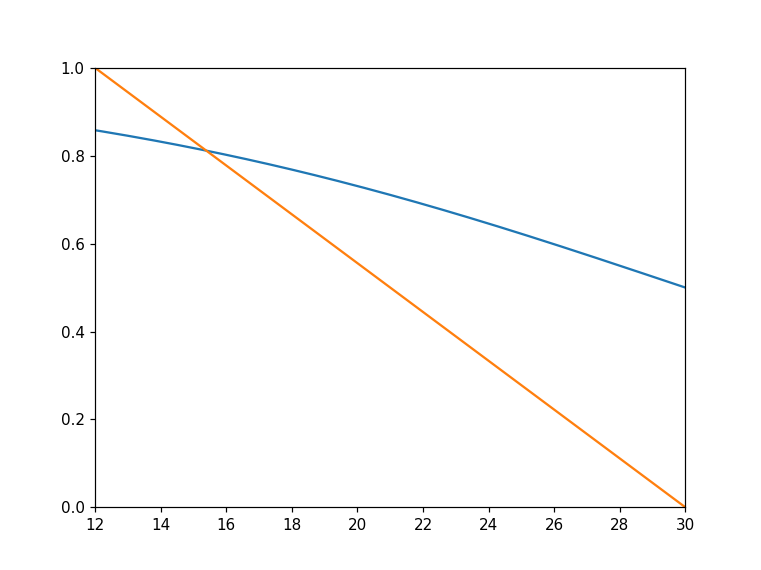

(12.0, 30.0)

In [44]:
x=np.arange(0.0,100.0,0.1)
y1=slc.SigThresh(x,30,-0.05)
y2=slc.LinearFunc(x,30,12)
figure()
plot(x,y1)
plot(x,y2)
ylim([0,1])
xlim([12,30])

In [22]:
slc.CalcLeadingPerformance(outdata_list[idx],para_list[idx],ignore_timepoints=0)


-----------------------------------
Leader i=0
-----------
all_avgdist      = [8.80247236]
tot_avgdist      = 8.802472356091553
all_finaldist    = [11.58838045]
tot_finaldist    = 11.588380454168243
leadRatio        = 0.0
leadingTime      = 73.45
finalDistToTarget= [6.64130693 5.07577083]
leadingSuccess   = [0.94129859 0.9551361 ]
lead_displacement = 81.25490937891375
-----------------------------------
-----------------------------------
Leader i=1
-----------
all_avgdist      = [8.80247236]
tot_avgdist      = 8.802472356091553
all_finaldist    = [11.58838045]
tot_finaldist    = 11.588380454168243
leadRatio        = 1.0
leadingTime      = 73.45
finalDistToTarget= [6.64130693 5.07577083]
leadingSuccess   = [0.94129859 0.9551361 ]
lead_displacement = 74.59979407158622
-----------------------------------
Target Unit Vector: [0.70710678 0.70710678]


In [30]:
df=slc.ProcessParallelResults(para1name,para2name,para_list,outdata_list)
df

Starting type dataFrame= <class 'NoneType'>


,leadershipRange0,leadershipRange1,leader_algstrength0,run,leadRatio0,leadRatio1,tot_avgdist0,tot_avgdist1,tot_finaldist0,tot_finaldist1,avg_displacement0,finalDistToTarget0,finalDistToTarget1,avg_vel2target0,avg_vel2target1,targetMovement00,targetMovement01,tot_time,leadingTime0,leadingTime1
0,0.0,16.0,8.0,0,0.000000,1.000000,6.852435,6.852435,7.297021,7.297021,81.410821,5.243882,7.542204,0.872864,0.832864,0.037373,0.039364,121.65,121.65,-1.0
1,0.0,16.0,8.0,1,0.000000,1.000000,8.802472,8.802472,11.588380,11.588380,77.927352,6.641307,5.075771,1.441267,1.392050,0.038726,0.034706,73.45,73.45,-1.0
2,0.0,16.0,12.0,0,0.000000,1.000000,4.528789,4.528789,4.301642,4.301642,75.759146,5.285695,2.877009,6.509100,6.572070,0.035662,0.035714,16.10,16.10,-1.0
3,0.0,16.0,12.0,1,0.000000,1.000000,6.914111,6.914111,7.359155,7.359155,75.117904,5.445908,1.939801,6.769938,6.390965,0.035360,0.035462,15.60,15.60,-1.0
4,0.0,16.0,16.0,0,0.000000,0.982670,6.306911,6.306911,10.644766,10.644766,76.925328,4.846490,10.375471,0.496031,0.415232,0.039538,0.032878,213.50,213.50,-1.0
5,0.0,16.0,16.0,1,0.000000,1.000000,5.398072,5.398072,8.608610,8.608610,68.532008,5.371297,10.219724,1.208402,1.152142,0.032062,0.032493,82.65,82.65,-1.0
6,12.0,16.0,8.0,0,0.672474,0.742160,8.632795,8.632795,5.361081,5.361081,70.095610,7.732675,3.288905,6.768391,7.214138,0.031886,0.034149,14.35,14.35,-1.0
7,12.0,16.0,8.0,1,0.347826,0.922266,10.040220,10.040220,6.688688,6.688688,70.543975,8.893682,8.880283,2.731259,2.653416,0.033190,0.033244,37.95,37.95,-1.0
8,12.0,16.0,12.0,0,0.360544,0.744898,11.295470,11.295470,14.494038,14.494038,75.579452,6.261708,8.340077,6.798894,6.695758,0.031836,0.039661,14.70,14.70,-1.0
9,12.0,16.0,12.0,1,0.303767,1.000000,9.756958,9.756958,3.488746,3.488746,72.665724,5.893173,8.833395,2.605326,2.391604,0.035743,0.032647,41.15,41.15,-1.0


In [25]:
dfgrouped_mean=df.groupby('leadershipRange0',as_index=False).mean()

<IPython.core.display.Javascript object>


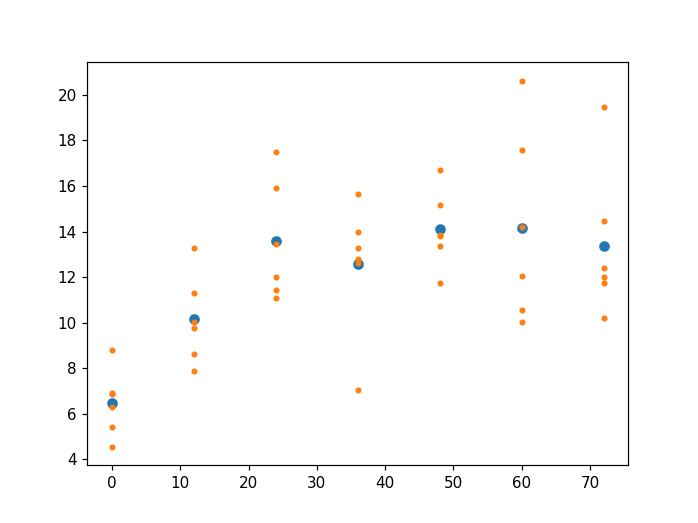

In [29]:
plot(dfgrouped_mean.leadershipRange0,dfgrouped_mean.tot_avgdist0,'o')
plot(df.leadershipRange0,df.tot_avgdist0,'.')

In [37]:
para1name="leadershipRange"
para2name="noisep"
columns=[para1name,para2name,"run","leadRatio","tot_avgdist","avg_displacement"]
df=pd.DataFrame(columns=columns)
for i in range(len(para_list)):
    print("N={},leaderRange={},run={}".format(para_list[i]['N'],
          para_list[i]['leadershipRange'],
          para_list[i]['run']))
    slc.CalcLeadingPerformance(outdata_list[i],para_list[i],ignore_timepoints=0)
    
    dataLine=dict()
    dataLine[para1name]=para_list[i][para1name]
    dataLine[para2name]=para_list[i][para2name]
    dataLine['run']=para_list[i]['run']
    dataLine['leadRatio']=np.mean(outdata_list[i]['leadRatio'])
    dataLine['tot_avgdist']=np.mean(outdata_list[i]['tot_avgdist'])
    dataLine['avg_displacement']=np.mean(outdata_list[i]['avg_displacement'])
    df=df.append(dataLine,ignore_index=True)
    
    #print(outdata_list[i]['leadRatio'])

N=2,leaderRange=6,run=0
-----------------------------------
Leader i=0
-----------
all_avgdist      = [ 6.02829993]
tot_avgdist      = 6.028299925632284
leadRatio        = 0.1727
leadingTime      = [-1.]
avg_displacement = 167.3031381482284
lead_displacement = [ 168.04925172  -26.15555142]
fish_displacement = [ 166.55702458  -28.33596352]
-----------------------------------
N=2,leaderRange=6,run=1
-----------------------------------
Leader i=0
-----------
all_avgdist      = [ 7.92478926]
tot_avgdist      = 7.924789262684292
leadRatio        = 0.0795
leadingTime      = [ 476.5]
avg_displacement = 214.9658979371523
lead_displacement = [ 216.55450416    5.62977638]
fish_displacement = [ 213.37729171    2.95139547]
-----------------------------------
N=2,leaderRange=6,run=2
-----------------------------------
Leader i=0
-----------
all_avgdist      = [ 7.78733634]
tot_avgdist      = 7.7873363432172145
leadRatio        = 0.189
leadingTime      = [ 329.5]
avg_displacement = 309.8704531745030

In [20]:
slc.ProcessParallelResults(para1name,para2name,para_list,outdata_list,
                           outpath="/home/prom/work/tmp/results.h5")

NameError: name 'para1name' is not defined

In [86]:
a=10.
array=np.array(a,ndmin=1)
print(type(a))
print(array)


<class 'float'>
[10.]


In [89]:
dataDict=dict()
dataDict['a']=[2]
dataDict['b']=[3]
df=pd.DataFrame.from_dict(dataDict,)
df

,a,b
0,2,3


In [74]:
dataDict=dict()
dataDict['test']=34
dataArray=np.arange(10)
dataKey='number'
dataDict=slc.CreateDictEntriesForArrayData(dataDict,dataKey,dataArray)

In [100]:
a='test'
if(a=='blabla'):
    print("yes")

In [40]:
infile='/home/prom/work/Leadership/DATA/Leader-NaiveLeader/para_targetType2_leadershipRangeList_6.0_36.0_leader_algstrength_1.0_3.0.pkl'
para=pkl.load(open(infile,'rb'))
para['targetVectorList']

[[2000, 0]]

In [34]:
infile='/home/prom/work/Leadership/DATA/Leader-NaiveLeader/para_targetType2_leadershipRangeList_6.0_36.0_leader_algstrength_0.5_3.0.pkl'
para1=pkl.load(open(infile,'rb'))
infile='/home/prom/work/Leadership/DATA/para_targetType2_leadershipRange_0.0_72.0_leader_algstrength_0.5_3.0.pkl'
para2=pkl.load(open(infile,'rb'))

In [35]:
for k in para.keys():
    print(k,para1[k])
    #print(k,para1[k],para2[k]) 


time 300.0
dt 0.05
output 0.5
L 3000
N 2
IC 0
BC 0
int_type matrix
dist_dependence overlap
steps 6000
stepout 10
outsteps 600
alpha 0.5
speed0 5.0
wallrepdist 1
wallrepstrength 5.0
attstrengthDist 0
attstrength 2.0
attrange 30.0
attsteepness -20
repstrength 5.0
reprange 3.0
repsteepness -20
algstrength 0.0
algrange 5.0
algsteepness -20
blindangle 0.0
blindanglesteepness 50
kneigh 6
noisep 2.0
sigmap 0.4472135954999579
targetType 2
leaderCount 2
leadershipWeight 0.0
leadershipRangeList []
leadershipRange 12
recruitingRangeList []
recruitingRange 6
recruitingTime 0.05
recruitingAttStrength 5.0
recruitingStrategy nearest
recruitingSpeed 6.0
leadingDistance 2000
targetVectorList [[2000, 0]]
targetVector [2000, 0]
deltaDistTarget 5
leader_repstrength 5.0
leader_algstrength 4.0
leader_attstrength 4.0
leader_reprange 3.0
leader_algrange 0.5
leader_attrange 1000.0
leader_desiredPhi [0.0, None]
leader_noisep 1.0
leader_sigmap 0.31622776601683794


In [36]:
infile="/mnt/DATA/leadershipModelOLD/leadershipRange_0_72_noisep_2.0_4.0.h5"
infile="/mnt/DATA/leadershipModelOLD/recruitingStrength5/attstrengthDist0_v5/leadershipRange_0_72_noisep_1.0_2.5.h5"
infile="/mnt/DATA/leadershipModelOLD/recruitingStrength5/attstrengthDist1_v5/leadershipRange_0_72_noisep_1.0_2.5.h5"
infile="/mnt/DATA/leadershipModelOLD/recruitingStrength20/attstrengthDist1_v8/leadershipRange_0_72_noisep_2.0_4.0.h5"
infile="/mnt/DATA/leadershipModel/speed5/leadershipRange_0_72_noisep_2.0_5.0.h5"
infile="/mnt/DATA/leadershipModel/targetType0_leadershipRange_0_72_noisep_2.0_5.0.h5"
infile="/home/prom/work/Leadership/DATA/Leader-NaiveLeader/targetType2_leadershipRangeList_6.0_36.0_leader_algstrength_1.0_3.0.h5"
infile="/home/prom/work/Leadership/DATA/targetType2_leadershipRange_0.0_72.0_leader_algstrength_0.5_3.0.h5"
df=pd.read_hdf(infile)
filename=infile.split("/")[-1][:-3]
srcpath=infile[:-(len(filename)+3)]
print(srcpath,filename)
#filenameWithoutNoiseList=filename.split('_')[:-2]
#filenameWithoutNoise=""
#for fstr in filenameWithoutNoiseList:
#    filenameWithoutNoise+=fstr+'_'
#print(filenameWithoutNoise)
#df.to_csv(srcpath+filename+'.csv',index=False)
#df0=pd.read_hdf("/mnt/DATA/leadershipModel/leadershipRange_0_0_noisep_1.0_2.5.h5")
#df.iloc[:300]=df0.iloc[:300]
#df.to_csv("/mnt/DATA/leadershipModel/leadershipRange_0_72_noisep_1.0_2.5.csv",index=False)
#print(pd.unique(df.noisep))

val=1.0
var='leader_algstrength0'
if(len(pd.unique(df[var]))>1):
    df_tmp=df[df[var]==val]
else:
    df_tmp=df
    
groupVar='leadershipRange0'
dfgrouped=df_tmp.groupby([groupVar],as_index=False).mean()

df_tmp


/home/prom/work/Leadership/DATA/ targetType2_leadershipRange_0.0_72.0_leader_algstrength_0.5_3.0


,leadershipRange0,leader_algstrength0,run,leadRatio0,tot_avgdist0,tot_finaldist0,avg_displacement0,finalDistToTarget0,finalDistToTarget1,targetMovement00,targetMovement01,tot_time,leadingTime0
100,0.0,1.0,0,0.000000,4.251403,4.788545,58.016886,76.835474,81.619191,0.041836,0.034786,300.00,-1.00
101,0.0,1.0,1,0.000000,4.289085,3.469610,73.759694,5.700457,6.919533,0.071113,0.067773,25.25,25.25
102,0.0,1.0,2,0.000000,4.124782,6.056819,17.928264,86.008261,85.926934,0.015817,0.015172,300.00,-1.00
103,0.0,1.0,3,0.000000,3.923935,3.845736,75.531069,5.024968,5.158853,0.068570,0.073622,33.60,33.60
104,0.0,1.0,4,0.000000,4.174590,4.860214,75.292364,4.695022,6.215694,0.071155,0.070665,108.50,108.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,72.0,1.0,95,0.878434,20.508945,9.433426,74.139084,4.816930,8.918401,0.069454,0.070241,85.55,85.55
2596,72.0,1.0,96,1.000000,13.924876,15.465366,71.809316,5.657312,12.667469,0.071880,0.063291,25.80,25.80
2597,72.0,1.0,97,1.000000,8.481785,11.325412,69.313967,5.164967,16.460689,0.066723,0.063932,21.60,21.60
2598,72.0,1.0,98,1.000000,16.175060,18.807281,63.651400,6.084670,24.835194,0.070077,0.050357,22.80,22.80


<IPython.core.display.Javascript object>


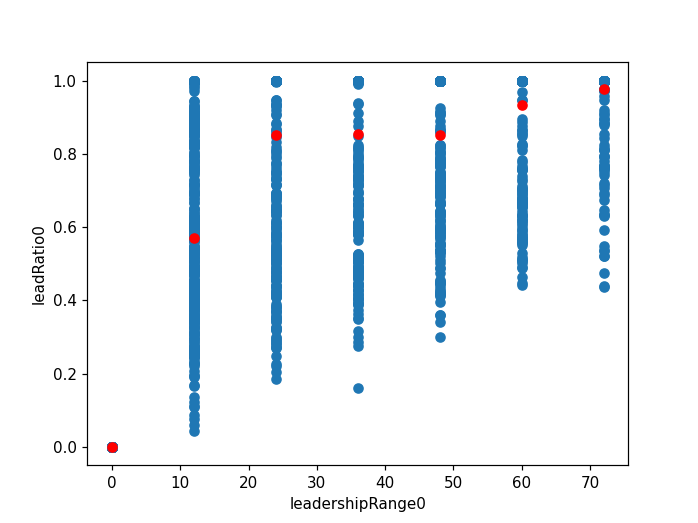

Text(0, 0.5, 'leadRatio0')

In [40]:
xvar='leadershipRange0'
yvar='targetMovement01'
yvar='leadRatio0'

#print(np.shape(leadershipRanges))
#leadershipRangesA=np.array(leadershipRanges)
x=df[xvar]
y=np.array(df[yvar])
xm=np.array(dfgrouped[xvar])
ym=np.array(dfgrouped[yvar])
#y[y>2500]=3000-y[y>2500]
figure()
#df.leadershipRangeList.iloc[:][0]
plot(x,y,'o')
plot(xm,ym,'ro')
xlabel(xvar)
ylabel(yvar)

In [18]:
dfgrouped

,leadershipRange0,leadershipRange1,leader_algstrength0,run,leadRatio0,leadRatio1,tot_avgdist0,tot_avgdist1,tot_finaldist0,tot_finaldist1,avg_displacement0,finalDistToTarget0,finalDistToTarget1,targetMovement00,targetMovement01,tot_time,leadingTime
0,12.0,12.0,3.0,49.5,0.922763,0.922763,5.879999,5.879999,5.588470,5.588470,1404.428767,590.431509,592.344692,0.936955,0.935456,300.0,-1.0
1,24.0,12.0,3.0,49.5,0.978758,0.734135,7.841532,7.841532,7.313367,7.313367,1418.981355,573.259891,579.196704,0.948050,0.943776,300.0,-1.0
2,36.0,12.0,3.0,49.5,0.995790,0.724095,7.788155,7.788155,7.120580,7.120580,1458.749438,533.505591,539.349899,0.974346,0.970785,300.0,-1.0


In [20]:
leadTime

1100   -1.0
1101   -1.0
1102   -1.0
1103   -1.0
1104   -1.0
       ... 
4795   -1.0
4796   -1.0
4797   -1.0
4798   -1.0
4799   -1.0
Name: leadingTime, Length: 300, dtype: float64

   leadershipRange0  leader_algstrength0   run  leadRatio0  tot_avgdist0  \
0               0.0                  3.0  49.5    0.000000      5.423961   
1              12.0                  3.0  49.5    0.691084      9.374197   
2              24.0                  3.0  49.5    0.860326     12.200611   
3              36.0                  3.0  49.5    0.896934     14.356395   
4              48.0                  3.0  49.5    0.905911     15.440732   
5              60.0                  3.0  49.5    0.966346     14.163537   
6              72.0                  3.0  49.5    0.987589     16.644004   

   tot_finaldist0  avg_displacement0  finalDistToTarget0  finalDistToTarget1  \
0        5.312738          70.744947           11.364157           11.028308   
1        7.482965          71.101678            5.692506           10.579329   
2       11.942748          67.751248            5.788687           16.920234   
3       13.873126          67.193580            5.801566           18.8

<IPython.core.display.Javascript object>


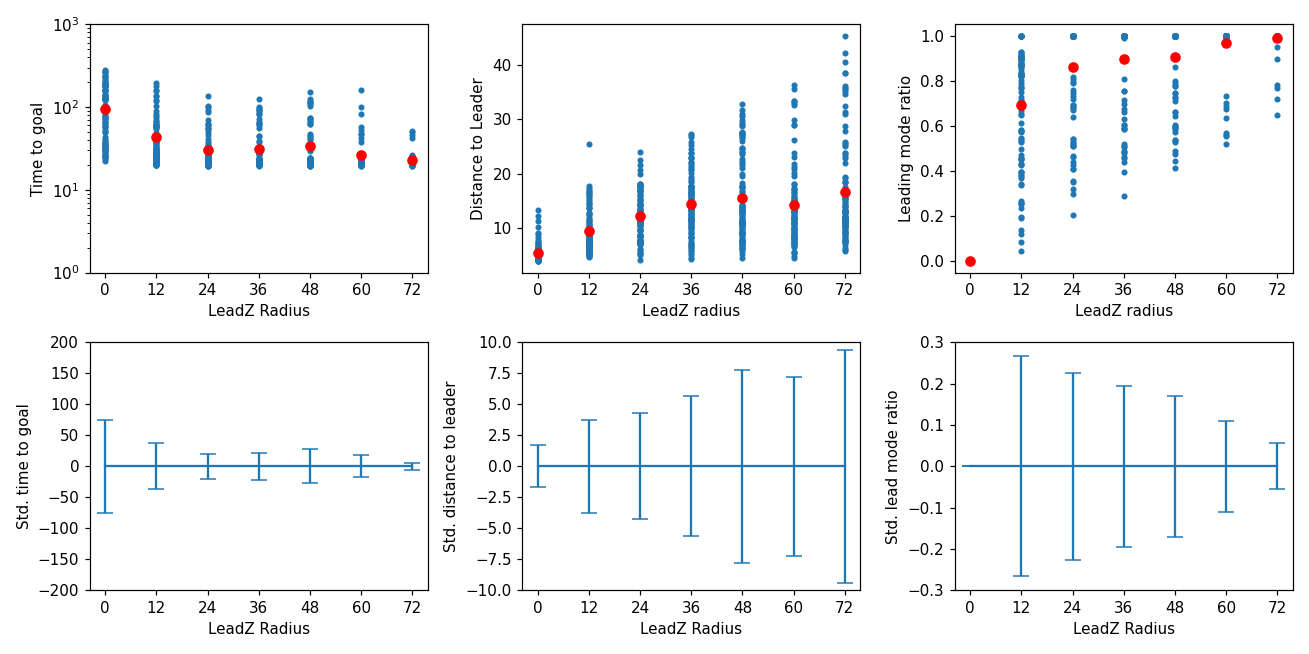

In [25]:
############### Select data #####################
var=3.0
df_tmp=df[df.leader_algstrength0==var]
df_tmp=df_tmp[df_tmp.leadershipRange0.isin([0,12,24,36,48,60,72])]
#df_tmp.to_csv(srcpath+filenameWithoutNoise+'{}_asInExp.csv'.format(noise))
dfgrouped=df_tmp.groupby(['leadershipRange0'],as_index=False).mean()
dfgrouped_std=df_tmp.groupby(['leadershipRange0'],as_index=False).std()

print(dfgrouped)

xt=[0,12,24,36,48,60,72]

try:
    leadTime=df_tmp.leadingTime0
except:
    leadTime=df_tmp.leadingTime


################ Create Figures ###########################
figure(figsize=(12,6))
subplot(231)
semilogy(df_tmp.leadershipRange0,df_tmp.leadingTime0,'.')
plot(dfgrouped.leadershipRange0, dfgrouped.leadingTime0,'ro')
xlabel('LeadZ Radius')
ylabel('Time to goal')
ylim([1,1000])
xticks(xt)
tight_layout()
#savefig(srcpath+"LeadingTime_vs_LeadZ_noise{}.png".format(noise),dpi=300)

subplot(232)
#figure(figsize=(4,3))
plot(df_tmp.leadershipRange0,df_tmp.tot_avgdist0,'.')
plot(dfgrouped.leadershipRange0,dfgrouped.tot_avgdist0,'ro')
xlabel('LeadZ radius')
ylabel('Distance to Leader')
xticks(xt)
tight_layout()
#savefig(srcpath+"DistLeader_vs_LeadZ_noise{}.png".format(noise),dpi=300)

subplot(233)
#figure(figsize=(4,3))
plot(df_tmp.leadershipRange0,df_tmp.leadRatio0,'.')
plot(dfgrouped.leadershipRange0,dfgrouped.leadRatio0,'ro')
xlabel('LeadZ radius')
ylabel('Leading mode ratio')
tight_layout()
xticks(xt)
#savefig(srcpath+"LeadRatio_vs_LeadZ_noise{}.png".format(noise),dpi=300)
#savefig(srcpath+"LeadPerformence_vs_LeadZ_var{}.png".format(var),dpi=300)

subplot(234)
errorbar(dfgrouped.leadershipRange0,np.zeros(len(dfgrouped.leadershipRange0)),yerr=dfgrouped_std.leadingTime0,capsize=5)
xlabel('LeadZ Radius')
ylabel('Std. time to goal')
ylim([-200,200])
xticks(xt)
tight_layout()

subplot(235)
errorbar(dfgrouped.leadershipRange0,np.zeros(len(dfgrouped.leadershipRange0)),yerr=dfgrouped_std.tot_avgdist0,capsize=5)
xlabel('LeadZ Radius')
ylabel('Std. distance to leader')
ylim([-10,+10])
xticks(xt)
tight_layout()

subplot(236)
errorbar(dfgrouped.leadershipRange0,np.zeros(len(dfgrouped.leadershipRange0)),yerr=dfgrouped_std.leadRatio0,capsize=5)
xlabel('LeadZ Radius')
ylabel('Std. lead mode ratio')
ylim([-0.3,+0.3])
xticks(xt)
tight_layout()
#savefig(srcpath+"LeadingResults_var{}_AsInExp.png".format(var))

#outdata_list=data[0]
#para_list=data[1]

In [43]:
print(srcpath)sIn


/mnt/DATA/leadershipModelOLD/recruitingStrength5/attstrengthDist1_v5/


In [54]:
############### Select data - targetType 0 #####################
noise=4
df_tmp=df[df.noisep==noise]
df_tmp=df_tmp[df_tmp.leadershipRange.isin([0,12,24,36,48,60,72])]
df_tmp.to_csv(srcpath+filenameWithoutNoise+'{}.csv'.format(noise))
dfgrouped=df_tmp.groupby(['leadershipRange'],as_index=False).mean()
dfgrouped_std=df_tmp.groupby(['leadershipRange'],as_index=False).std()

In [55]:
dfgrouped

,leadershipRange,noisep,run,leadRatio,tot_avgdist,avg_displacement,tot_time,leadingTime,lead_displacement,fish_displacement
0,0.0,4.0,49.5,0.000000,8.027372,69.524189,2031.5028,1031.4028,67.681637,71.366741
1,12.0,4.0,49.5,0.340806,15.787685,92.865503,838.6192,638.5992,94.052553,91.678453
2,24.0,4.0,49.5,0.418522,20.566776,96.553949,507.5709,407.5609,99.268255,93.839643
3,36.0,4.0,49.5,0.448606,25.846538,62.883975,464.3452,364.3352,64.720321,61.047630
4,48.0,4.0,49.5,0.513026,30.356270,92.615589,235.8650,235.8650,96.949423,88.281755
5,60.0,4.0,49.5,0.578722,36.513362,93.360433,342.6244,342.6244,103.045871,83.674995
6,72.0,4.0,49.5,0.600932,40.837745,104.488261,278.4240,278.4240,112.862572,96.113949


In [225]:
df_tmp.to_csv('/mnt/DATA/leadershipModel/leadershipRange_0_72_noisep_{}_asInExp.csv'.format(noise))

In [97]:
#df[(df.leadershipRange==0) & (df.leadingTime>0)]

In [92]:
#dfgrouped

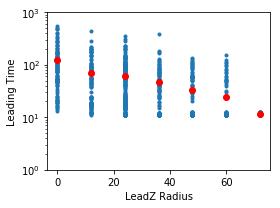

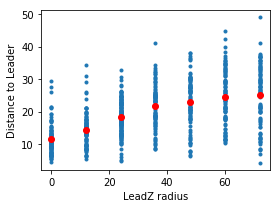

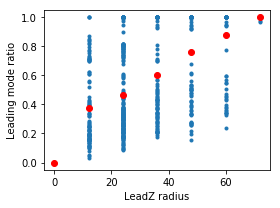

In [243]:
figure(figsize=(4,3))
semilogy(df_tmp.leadershipRange,df_tmp.leadingTime,'.')
plot(dfgrouped.leadershipRange,dfgrouped.leadingTime,'ro')
xlabel('LeadZ Radius')
ylabel('Leading Time')
ylim([1,1000])
tight_layout()
savefig(srcpath+"LeadingTime_vs_LeadZ_noise{}.png".format(noise),dpi=300)

figure(figsize=(4,3))
plot(df_tmp.leadershipRange,df_tmp.tot_avgdist,'.')
plot(dfgrouped.leadershipRange,dfgrouped.tot_avgdist,'ro')
xlabel('LeadZ radius')
ylabel('Distance to Leader')
tight_layout()
savefig(srcpath+"DistLeader_vs_LeadZ_noise{}.png".format(noise),dpi=300)


figure(figsize=(4,3))
plot(df_tmp.leadershipRange,df_tmp.leadRatio,'.')
plot(dfgrouped.leadershipRange,dfgrouped.leadRatio,'ro')
xlabel('LeadZ radius')
ylabel('Leading mode ratio')
tight_layout()
savefig(srcpath+"LeadRatio_vs_LeadZ_noise{}.png".format(noise),dpi=300)



In [54]:
#pd.unique(df_tmp[df_tmp.leadershipRange==2].avg_displacement)

In [74]:
#df_tmp.leadershipRange

In [12]:
para_list[i]

NameError: name 'para_list' is not defined